# Utilisation  de lmfit sans barre d'erreur

Dans un premier temps définissons "x" et "y", qui doivent être de même taille.
Définissons ensuite la fonction 

Créons le model en utilisant la classe Model de lmfit

ET ensuite appliquons la fonction de fit sur le model

ET pour finir il faut fair un plot sur les resultat du fit


{'a': 61.3425, 'b': 2.649999999999936, 'c': -14.12999999999982, 'd': -62.23000000000012}
61.3425 2.649999999999936 -14.12999999999982 -62.23000000000012


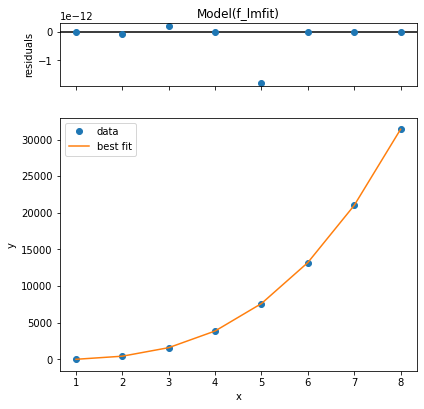

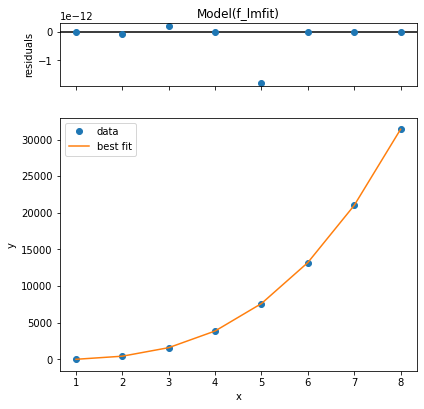

In [2]:
from lmfit import Model, Parameter, report_fit
import numpy as np
x_lmfit = np.linspace(1, 8, 8) # Coordonées de x
y_lmfit = np.array([-12.3675, 410.85, 1575.4774999999997, 3849.57, 7601.182500000001, 13198.369999999999, 21009.1875, 31401.69]) # Coordonées de y


def f_lmfit(x, a, b,c, d): # Fonction à fit
    return a * x ** 3 + b * x**2 + c*x + d

model = Model(f_lmfit, independent_vars=['x']) # Définissons le model avec, en parametre la fonction, et la variable independant qui est ici "x", ce dernier paramettre est optionnel

result = model.fit(y_lmfit, x=x_lmfit, a=Parameter('a', value=1, vary=True),  # Fit du model : la ligne a = Parameter('a', value = 10, vary = True) signifie que a peut varier
                   b=2, c=1, d=1)

dict1 = {}
print(result.values)
dict1 = result.values
print(*dict1.values())

# plt.scatter(x_lmfit, y_lmfit)
result.plot() # Affichage en plot des résultats


# Utilisation  de lmfit sans barre d'erreur et en fixant une valeur

Cela revient à la même chôse qu'au dessus, seulement lors de la définition des paramettre dans le fit il faut mettre vary a false et fixer notre variable avec la valeur souhaitais

{'a': 10, 'b': 695.7737492609211, 'c': -2658.268742738873, 'd': 2479.2237354604413}
10 695.7737492609211 -2658.268742738873 2479.2237354604413


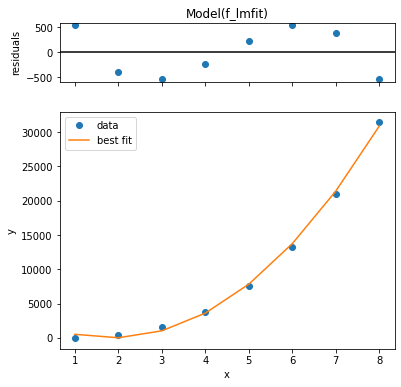

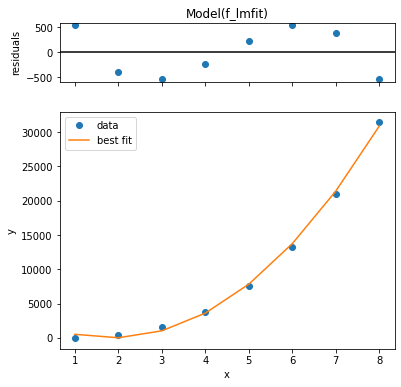

In [3]:
from lmfit import Model, Parameter, report_fit

x_lmfit = np.linspace(1, 8, 8)
y_lmfit = np.array([-12.3675, 410.85, 1575.4774999999997, 3849.57, 7601.182500000001, 13198.369999999999, 21009.1875, 31401.69])


def f_lmfit(x, a, b,c, d):
    return a * x ** 3 + b * x**2 + c*x + d

model_fix_var = Model(f_lmfit, independent_vars=['x']) 

result_fix_var = model_fix_var.fit(y_lmfit, x=x_lmfit, a=Parameter('a', value=10, vary=False), b=2, c=1, d=1) # la ligne a = Parameter('a', value = 10, vary = False) signifie que a vaudra forcément 10 et ne pourra pas varier
                                     
dict2 = {}
print(result_fix_var.values)
dict2 = result_fix_var.values
print(*dict2.values())

# plt.scatter(x_lmfit, y_lmfit)
result_fix_var.plot()


# Utilisation  de lmfit avec barre d'erreur

Ici nous pouvons afficher le plot avec les erreur asymetrique mais, le fit ne prendra pas en compte ses valeurs

{'a': 10, 'b': 695.7737492609211, 'c': -2658.268742738873, 'd': 2479.2237354604413}
61.3425 2.649999999999936 -14.12999999999982 -62.23000000000012


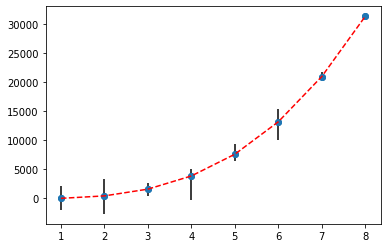

In [7]:
from lmfit import Model, Parameter, report_fit
import matplotlib.pyplot as plt


x_lmfit = np.linspace(1, 8, 8)
y_lmfit = np.array([-12.3675, 410.85, 1575.4774999999997, 3849.57, 7601.182500000001, 13198.369999999999, 21009.1875, 31401.69])
yErrorValues_lmfit = [np.array([2000,3110,1120,4130,1230,3210,400,30]), np.array([2200,3000,1120,1130,1730,2210,700,10])]


def f_lmfit(x, a, b,c, d):
    return a * x ** 3 + b * x**2 + c*x + d

model_error_bar = Model(f_lmfit, independent_vars=['x']) 

model_error_bar = model_fix_var.fit(y_lmfit, x=x_lmfit, a=1, b=2, c=1, d=1) # la ligne a = Parameter('a', value = 10, vary = False) signifie que a vaudra forcément 10 et ne pourra pas varier
                                     
dict3 = {}
print(result_fix_var.values)
dict3 = model_error_bar.values
print(*dict3.values())

plt.scatter(x_lmfit, y_lmfit)
plt.errorbar(x=x_lmfit, y=y_lmfit, yerr = yErrorValues_lmfit,
  fmt = 'o', ecolor = 'black', zorder = 1) # Trace les erreur asymetrique 
plt.plot(x_lmfit, f_lmfit(x_lmfit, *dict3.values()), 'r--')